<a href="https://colab.research.google.com/github/cynthiachandru/B1/blob/main/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import zscore

#df = "/content/drive/MyDrive/Colab Notebooks/input.csv"
#output = "/content/drive/MyDrive/Colab Notebooks/Output - gen_x.csv"

df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/bwd_lwn_max_01.csv")
df.head()



,Bwd Packet Length Max_0_zscore,Bwd Packet Length Max_1_zscore
0,-0.725139,2.420589
1,0.060274,1.650123
2,-0.725139,0.856557
3,-0.669970,-0.730574
4,-0.527834,2.420589


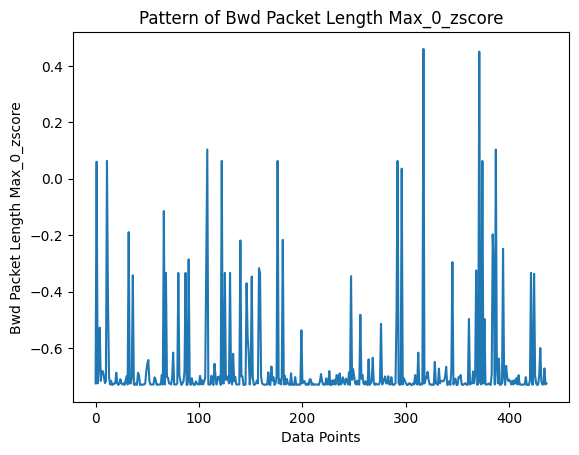

In [ ]:

# Visualize the pattern of feature1 using a line plot
plt.plot(df['Bwd Packet Length Max_0_zscore'])
plt.title('Pattern of Bwd Packet Length Max_0_zscore')
plt.xlabel('Data Points')
plt.ylabel('Bwd Packet Length Max_0_zscore')
plt.show()

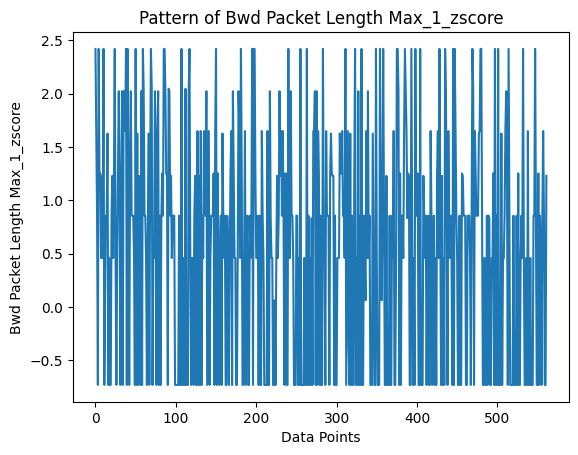

In [ ]:

# Visualize the pattern of feature1 using a line plot
plt.plot(df['Bwd Packet Length Max_1_zscore'])
plt.title('Pattern of Bwd Packet Length Max_1_zscore')
plt.xlabel('Data Points')
plt.ylabel('Bwd Packet Length Max_1_zscore')
plt.show()

In [ ]:
colors = ['red', 'blue']

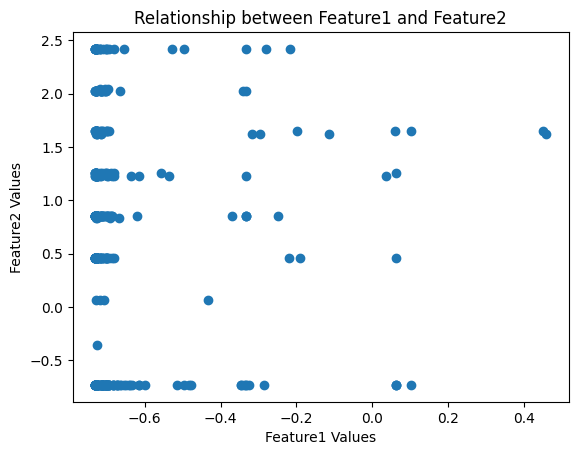

In [ ]:
# Visualize the relationship between feature1 and feature2 using a scatter plot
plt.scatter(df['Bwd Packet Length Max_0_zscore'],df['Bwd Packet Length Max_1_zscore'])
plt.title('Relationship between Feature1 and Feature2')
plt.xlabel('Feature1 Values')
plt.ylabel('Feature2 Values')
plt.show()

In [ ]:
# Compute the correlation matrix between feature1 and feature2
corr_matrix = df.corr()

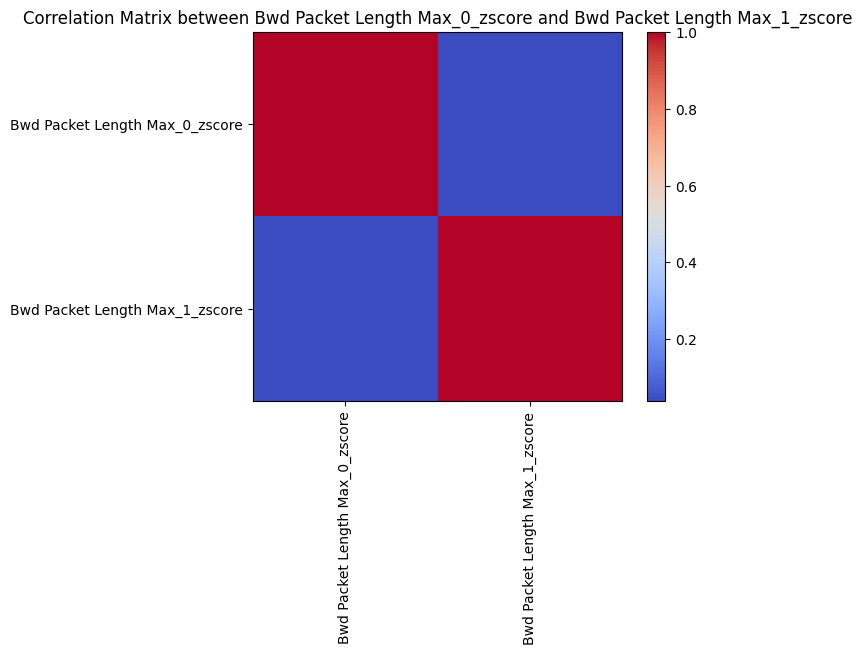

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix between Bwd Packet Length Max_0_zscore and Bwd Packet Length Max_1_zscore')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

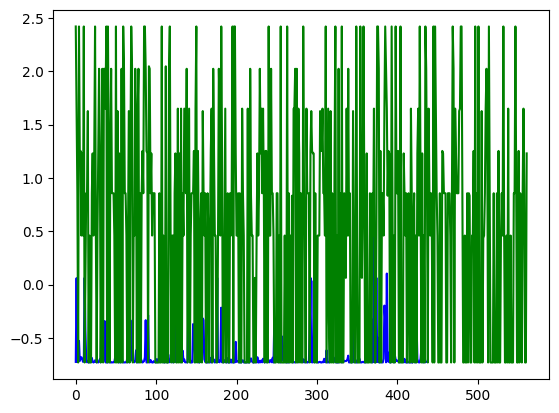

In [ ]:
# Create a line chart with time on the x-axis and feature 1 and feature 2 on the y-axis
plt.plot(df['Bwd Packet Length Max_0_zscore'], color='blue', label='Feature 1')
plt.plot(df['Bwd Packet Length Max_1_zscore'], color='green', label='Feature 2')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# Define the colors using a colormap
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, len(df['Bwd Packet Length Max_0_zscore'].unique())))

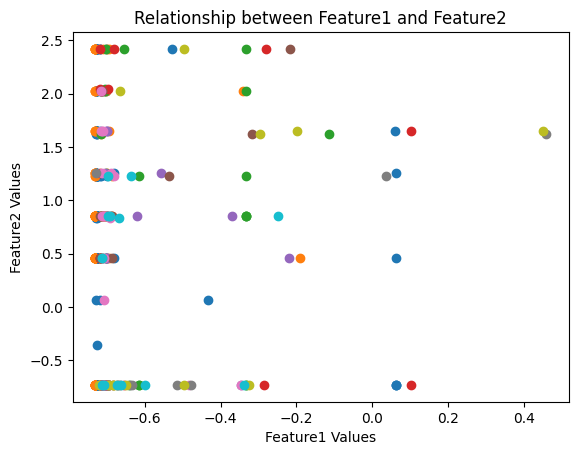

In [ ]:
# Create a scatter plot with different colors for each feature
for i, feature in enumerate(df['Bwd Packet Length Max_0_zscore'].unique()):
    plt.scatter(df.loc[df['Bwd Packet Length Max_0_zscore']==feature, 'Bwd Packet Length Max_0_zscore'], df.loc[df['Bwd Packet Length Max_0_zscore']==feature,'Bwd Packet Length Max_1_zscore'], color=colors[i])

plt.title('Relationship between Feature1 and Feature2')
plt.xlabel('Feature1 Values')
plt.ylabel('Feature2 Values')
plt.show()

In [ ]:
# Define the colors manually
colors = ['red', 'blue']

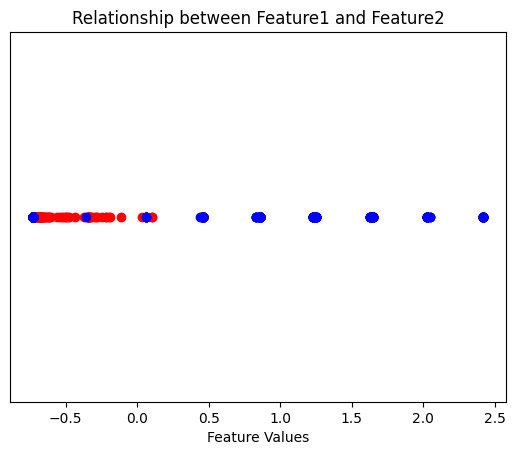

In [ ]:

# Create a scatter plot with different colors for each feature
for i, feature in enumerate(df[['Bwd Packet Length Max_0_zscore', 'Bwd Packet Length Max_1_zscore']].columns):
    plt.scatter(df[feature], np.zeros_like(df[feature]), color=colors[i])

plt.title('Relationship between Feature1 and Feature2')
plt.xlabel('Feature Values')
plt.yticks([])  # Hide the y-axis ticks
plt.show()





In [ ]:
benign_data = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/benign_new_0.csv")
malicious_data = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/mal_new_1.csv")

In [ ]:
print(benign_data.columns.tolist())

['Bwd Packet Length Max_zscore', 'Init_Win_bytes_forward_zscore', ' Fwd Packet Length Max_zscore', ' Bwd Packet Length Mean_zscore', ' Subflow Fwd Bytes_zscore', ' Fwd Packet Length Std_zscore', ' min_seg_size_forward_zscore', ' Flow IAT Min_zscore', ' Fwd IAT Min_zscore', ' Destination Port_zscore', 'Total Length of Fwd Packets_zscore', ' act_data_pkt_fwd_zscore', ' Label']


In [ ]:
# Extract selected features from both datasets
features = ['Bwd Packet Length Max_zscore', 'Init_Win_bytes_forward_zscore', ' Fwd Packet Length Max_zscore', ' Bwd Packet Length Mean_zscore', ' Subflow Fwd Bytes_zscore', ' Fwd Packet Length Std_zscore', ' min_seg_size_forward_zscore', ' Flow IAT Min_zscore', ' Fwd IAT Min_zscore', ' Destination Port_zscore', 'Total Length of Fwd Packets_zscore', ' act_data_pkt_fwd_zscore']
benign_features = benign_data[features]
malicious_features = malicious_data[features]

In [ ]:
# Select the 10 features to compare
selected_features = ['Bwd Packet Length Max_zscore', 'Init_Win_bytes_forward_zscore', ' Fwd Packet Length Max_zscore', ' Bwd Packet Length Mean_zscore', ' Subflow Fwd Bytes_zscore', ' Fwd Packet Length Std_zscore', ' min_seg_size_forward_zscore', ' Flow IAT Min_zscore', ' Fwd IAT Min_zscore', ' Destination Port_zscore', 'Total Length of Fwd Packets_zscore', ' act_data_pkt_fwd_zscore']


In [ ]:
from scipy.stats import f_oneway
# Compute the ANOVA for each feature
anova_results = []
for feature in selected_features:
    benign_feature = benign_data[feature].values
    malicious_feature = malicious_data[feature].values
    f_statistic, p_value = f_oneway(benign_feature, malicious_feature)
    anova_results.append({"feature": feature, "f-statistic": f_statistic, "p-value": p_value})

# Print the ANOVA results
print(anova_results)




[{'feature': 'Bwd Packet Length Max_zscore', 'f-statistic': 528.8277523160929, 'p-value': 3.190092364954944e-94}, {'feature': 'Init_Win_bytes_forward_zscore', 'f-statistic': 2.826808673259236, 'p-value': 0.09301559932519254}, {'feature': ' Fwd Packet Length Max_zscore', 'f-statistic': 110.64553386523865, 'p-value': 1.3020315419994406e-24}, {'feature': ' Bwd Packet Length Mean_zscore', 'f-statistic': 624.9035885421027, 'p-value': 1.8237082507082437e-107}, {'feature': ' Subflow Fwd Bytes_zscore', 'f-statistic': 126.28361028043666, 'p-value': 1.133045269195681e-27}, {'feature': ' Fwd Packet Length Std_zscore', 'f-statistic': 98.31438338227522, 'p-value': 3.6399174164397135e-22}, {'feature': ' min_seg_size_forward_zscore', 'f-statistic': 193.44084216100836, 'p-value': 2.535361300786346e-40}, {'feature': ' Flow IAT Min_zscore', 'f-statistic': 3.104662359342755, 'p-value': 0.07837483723681687}, {'feature': ' Fwd IAT Min_zscore', 'f-statistic': 4.61095393864418, 'p-value': 0.03200892858020118

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
# Extract selected features from both datasets
features1 = ['Bwd Packet Length Max_zscore', 'Init_Win_bytes_forward_zscore', ' Fwd Packet Length Max_zscore', ' Bwd Packet Length Mean_zscore', ' Subflow Fwd Bytes_zscore', ' Fwd Packet Length Std_zscore', ' min_seg_size_forward_zscore', ' Flow IAT Min_zscore', ' Fwd IAT Min_zscore', ' Destination Port_zscore', 'Total Length of Fwd Packets_zscore', ' act_data_pkt_fwd_zscore']
benign_features1 = benign_data[features1]
malicious_features1 = malicious_data[features1]

In [ ]:
# Convert NumPy arrays to pandas DataFrames
benign_features = pd.DataFrame(benign_features)
malicious_feature = pd.DataFrame(malicious_feature)

In [ ]:
print(benign_features.shape)      # (n_samples, n_features)
print(malicious_feature.shape)   # (n_samples, n_features)


(437, 12)
(562, 1)


In [ ]:
# Perform Mann-Whitney U test on each feature
for i, feature_name in enumerate(benign_features.columns):
    statistic, p_value = mannwhitneyu(benign_features1.iloc[:,i], malicious_features1.iloc[:,i])
    print(f"Feature {feature_name}: Mann-Whitney U = {statistic:.3f}, p-value = {p_value:.3f}")


Feature Bwd Packet Length Max_zscore: Mann-Whitney U = 80392.000, p-value = 0.000
Feature Init_Win_bytes_forward_zscore: Mann-Whitney U = 61023.500, p-value = 0.000
Feature  Fwd Packet Length Max_zscore: Mann-Whitney U = 172742.000, p-value = 0.000
Feature  Bwd Packet Length Mean_zscore: Mann-Whitney U = 80440.000, p-value = 0.000
Feature  Subflow Fwd Bytes_zscore: Mann-Whitney U = 155248.000, p-value = 0.000
Feature  Fwd Packet Length Std_zscore: Mann-Whitney U = 108967.500, p-value = 0.001
Feature  min_seg_size_forward_zscore: Mann-Whitney U = 155393.000, p-value = 0.000
Feature  Flow IAT Min_zscore: Mann-Whitney U = 132502.000, p-value = 0.030
Feature  Fwd IAT Min_zscore: Mann-Whitney U = 87082.500, p-value = 0.000
Feature  Destination Port_zscore: Mann-Whitney U = 160451.000, p-value = 0.000
Feature Total Length of Fwd Packets_zscore: Mann-Whitney U = 155248.000, p-value = 0.000
Feature  act_data_pkt_fwd_zscore: Mann-Whitney U = 58799.000, p-value = 0.000


In [ ]:
# Extract selected features from both datasets
features2 = ['Bwd Packet Length Max_zscore', 'Init_Win_bytes_forward_zscore', ' Fwd Packet Length Max_zscore', ' Bwd Packet Length Mean_zscore', ' Subflow Fwd Bytes_zscore', ' Fwd Packet Length Std_zscore', ' min_seg_size_forward_zscore', ' Flow IAT Min_zscore', ' Fwd IAT Min_zscore', ' Destination Port_zscore', 'Total Length of Fwd Packets_zscore', ' act_data_pkt_fwd_zscore']
benign_features2 = benign_data[features2]
malicious_features2 = malicious_data[features2]

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test on each feature for benign and malicious data separately
for i in range(12):
    statistic, p_value = ttest_ind(benign_features2.iloc[:, i], malicious_features2.iloc[:, i])
    print(f"Feature {i+1}: t-statistic = {statistic:.3f}, p-value = {p_value:.3f} for {benign_features.columns[i]}")


Feature 1: t-statistic = -22.996, p-value = 0.000 for Bwd Packet Length Max_zscore
Feature 2: t-statistic = 1.681, p-value = 0.093 for Init_Win_bytes_forward_zscore
Feature 3: t-statistic = 10.519, p-value = 0.000 for  Fwd Packet Length Max_zscore
Feature 4: t-statistic = -24.998, p-value = 0.000 for  Bwd Packet Length Mean_zscore
Feature 5: t-statistic = 11.238, p-value = 0.000 for  Subflow Fwd Bytes_zscore
Feature 6: t-statistic = 9.915, p-value = 0.000 for  Fwd Packet Length Std_zscore
Feature 7: t-statistic = 13.908, p-value = 0.000 for  min_seg_size_forward_zscore
Feature 8: t-statistic = 1.762, p-value = 0.078 for  Flow IAT Min_zscore
Feature 9: t-statistic = 2.147, p-value = 0.032 for  Fwd IAT Min_zscore
Feature 10: t-statistic = 19.698, p-value = 0.000 for  Destination Port_zscore
Feature 11: t-statistic = 11.238, p-value = 0.000 for Total Length of Fwd Packets_zscore
Feature 12: t-statistic = -1.196, p-value = 0.232 for  act_data_pkt_fwd_zscore


<ipython-input-28-26b18611480a>:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statistic, p_value = ttest_ind(benign_features2.iloc[:, i], malicious_features2.iloc[:, i])


In [ ]:
from scipy.stats import kruskal
# perform the Kruskal-Wallis test for each feature


for i in range(12):
    statistic, p_value = kruskal(benign_features2.iloc[:, i], malicious_features2.iloc[:, i])
    print(f"Feature {i+1}: Kruskal-Wallis test statistic = {statistic:.3f}, p-value = {p_value:.3f} for {benign_features.columns[i]}")



Feature 1: Kruskal-Wallis test statistic = 89.774, p-value = 0.000 for Bwd Packet Length Max_zscore
Feature 2: Kruskal-Wallis test statistic = 199.298, p-value = 0.000 for Init_Win_bytes_forward_zscore
Feature 3: Kruskal-Wallis test statistic = 133.117, p-value = 0.000 for  Fwd Packet Length Max_zscore
Feature 4: Kruskal-Wallis test statistic = 89.475, p-value = 0.000 for  Bwd Packet Length Mean_zscore
Feature 5: Kruskal-Wallis test statistic = 52.416, p-value = 0.000 for  Subflow Fwd Bytes_zscore
Feature 6: Kruskal-Wallis test statistic = 10.747, p-value = 0.001 for  Fwd Packet Length Std_zscore
Feature 7: Kruskal-Wallis test statistic = 168.371, p-value = 0.000 for  min_seg_size_forward_zscore
Feature 8: Kruskal-Wallis test statistic = 4.693, p-value = 0.030 for  Flow IAT Min_zscore
Feature 9: Kruskal-Wallis test statistic = 63.166, p-value = 0.000 for  Fwd IAT Min_zscore
Feature 10: Kruskal-Wallis test statistic = 89.821, p-value = 0.000 for  Destination Port_zscore
Feature 11: Krus